# 서울, 대구 기온분석

#### 1. 기상 관측 이래, 서울의 최고 기온이 가장 높았던 날은 언제였고, 몇도인가요?

,날짜,최고기온(℃)
40051,2018-08-01,39.6


평균 :  17.956986301369867
중위값 :  19.8
최빈값    최고기온(℃)
0     19.0
1     23.3
2     25.5
3     27.0
4     28.2


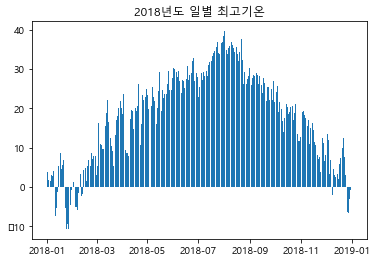

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import warnings

warnings.filterwarnings(action='ignore')

df = pd.read_csv('./temp_seoul.csv', encoding='cp949')
# display(df)
maximum = df['최고기온(℃)'].max()
result = df.loc[df['최고기온(℃)']==maximum, :]
display(result[['날짜', '최고기온(℃)']])


# graph

font_path = 'C:/Users/sun/Desktop/Data/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df['날짜'] = pd.to_datetime(df['날짜'])
e_df = df.loc[df['날짜'].dt.year==2018]
plt.bar(e_df['날짜'], e_df['최고기온(℃)'])
plt.title('2018년도 일별 최고기온')

plt.show

# 기술통계
high_temp = e_df['최고기온(℃)']
high_df = pd.DataFrame(high_temp)
# display(high_df)
print('평균 : ', high_temp.mean())
print('중위값 : ', np.median(high_temp))
print('최빈값', high_df.mode())

- 1월과 2월 사이에 최고기온이 영하 10도 가까이 되었던 적이 있다

#### 2. 역사적으로 일교차가 가장 큰 날짜는 몇년, 몇월, 몇일인가요?

In [15]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
# import matplotlib.

warnings.filterwarnings(action='ignore')


# 서울
df = pd.read_csv('./temp_seoul.csv', encoding='cp949')
df['일교차'] = df['최고기온(℃)'] - df['최저기온(℃)']
# display(df)
maximum = df['일교차'].max()
result = df.loc[df['일교차']==maximum]
print('서울')
display(result[['날짜', '일교차']])

# 대구
d_df = pd.read_csv('./temp_daegu.csv', encoding='cp949')
result = d_df.dropna(subset=['평균기온(℃)', '최고기온(℃)', '최저기온(℃)'],
                     axis=0, how='any')
result['일교차'] = result['최고기온(℃)']-result['최저기온(℃)']
maximum = result['일교차'].max()
re_result = result.loc[result['일교차']==maximum]
print('대구')
display(re_result[['날짜', '일교차']])


# graph




# 기술통계
gapd_temp = re_result['최고기온(℃)']
print('대구')
print('평균 : ', gapd_temp.mean())
print('중위값 : ', gapd_temp.median())
print('최빈값', '\n', gapd_temp.mode())
print()
gaps_temp = result['최고기온(℃)']
gaps_df = pd.DataFrame(gaps_temp)
print('서울')
print('평균 ', gaps_df.mean())
print('중위값 ', gaps_df.median())
print('최빈값', gaps_df.mode())

서울


,날짜,일교차
12619,1942-04-19,21.8


대구


,날짜,일교차
2255,1913-04-04,26.2


대구
평균 :  26.0
중위값 :  26.0
최빈값 
 0    26.0
Name: 최고기온(℃), dtype: float64

서울
평균  최고기온(℃)    18.866027
dtype: float64
중위값  최고기온(℃)    20.2
dtype: float64
최빈값    최고기온(℃)
0     29.4


#### 3. 1년 중 평균적으로 일교차가 가장 큰 날짜는 몇월, 몇일인가요?

11.928828828828829
월  일 
4  29    11.928829
Name: 일교차, dtype: float64


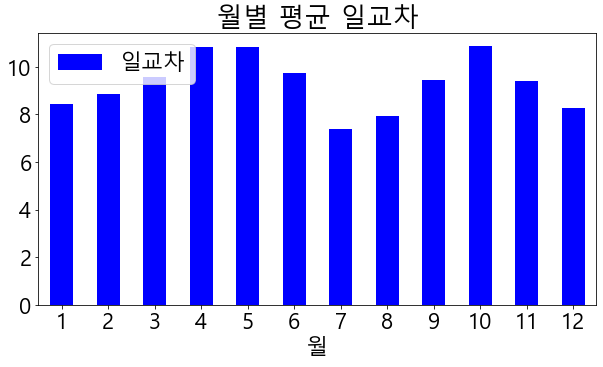

편차평균 :  -5.181040781584064e-16
분산 :  1.2530518404016366
표본분산 :  1.2530518404016366
불편분산  일교차    1.366966
dtype: float64
표본분산  일교차    1.253052
dtype: float64


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./temp_seoul.csv', encoding='cp949')
df['날짜'] = pd.to_datetime(df['날짜'])
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day
df['일교차'] = df['최고기온(℃)']-df['최저기온(℃)']
# display(df)

mean_df = df.groupby(['월','일'])['일교차'].mean()
# display(mean_df)
max_gap = mean_df.values.max()
print(max_gap)
result = mean_df.loc[mean_df.values==max_gap]
print(result)

# graph
df = df.groupby(['월']).mean()

font_path = 'C:/Users/sun/Desktop/Data/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df.reset_index().plot(kind='bar',
                        x='월',
                        y='일교차',
                        color='b',
                        figsize=(10,5))
plt.xticks(rotation='horizontal')
plt.title('월별 평균 일교차')
plt.show()


# 기술통계
gap = df['일교차']
gap_df = pd.DataFrame(gap)
deviation = gap - gap.mean()
print('편차평균 : ', deviation.mean())
print('분산 : ', np.mean(deviation**2))
print('표본분산 : ', np.var(gap))
print('불편분산 ', gap_df.var())
print('표본분산 ', gap_df.var(ddof=0))

#### 4. 가장 덥다고 알려진 대구보다 서울이 더 더운 날이 가장 많은 연도는 언제인가요?

가장 많이 더운 연도 : [1930]


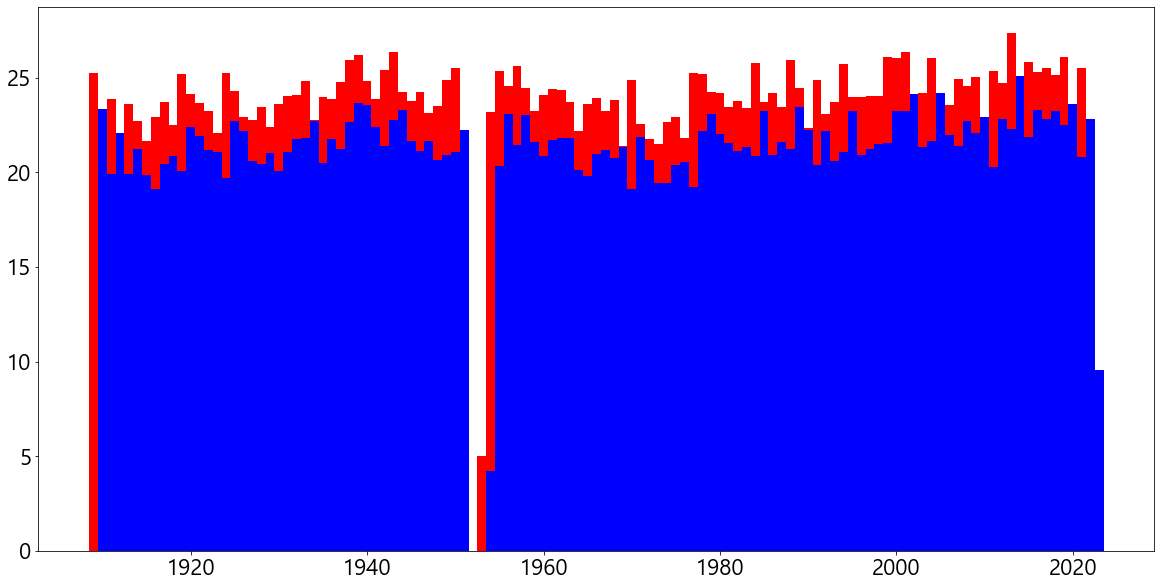

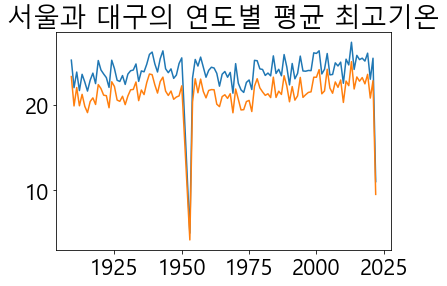

서울
편차평균 :  2.910265653963914e-13
분산 :  120.57046966296102
표본분산 :  120.57046966296102
불편분산  최고기온(℃)_x    120.573472
dtype: float64
표본분산  최고기온(℃)_x    120.57047
dtype: float64
대구
편차평균 :  1.2760677861877183e-13
분산 :  101.60463132970459
표본분산 :  101.60463132970459
불편분산  최고기온(℃)_y    101.607161
dtype: float64
표본분산  최고기온(℃)_y    101.604631
dtype: float64


In [26]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

warnings.filterwarnings(action='ignore')

s_df = pd.read_csv('./temp_seoul.csv', encoding='cp949')
d_df = pd.read_csv('./temp_daegu.csv', encoding='cp949')
mer_df = pd.merge(s_df, d_df, on='날짜', how='inner')
df = mer_df.dropna(subset=['평균기온(℃)_x', '최고기온(℃)_x', '최저기온(℃)_x',
                           '평균기온(℃)_y', '최고기온(℃)_y', '최저기온(℃)_y'],
                     axis=0, how='any')
# display(df.head())

cond1 = df['최고기온(℃)_x'] > df['최고기온(℃)_y']
result = df.loc[cond1, :]
result['날짜'] = pd.to_datetime(result['날짜'])
result['연도'] = result['날짜'].dt.year
# display(result)

cond = result['연도'].value_counts()
maximum = cond.max()
# print(maximum)
re_result = cond.loc[cond.values==maximum]

print('가장 많이 더운 연도 : ', end='')
print(re_result.index.values)

# graph
re_df = result.groupby(['연도']).mean()
# display(re_df)

font_path = 'C:/Users/sun/Desktop/Data/malgun.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
fm.rcParams.update({'font.size':22})

plt.figure(figsize=(20,10))
p1 = plt.bar(re_df.index, re_df['최고기온(℃)_x'],
             width=1,
            color='red',
            label='서울 최고기온')
p2 = plt.bar(re_df.index+1, re_df['최고기온(℃)_y'],
             width = 1,
            color='blue',
            label='대구 최고기온')
plt.show()

p1 = plt.plot(re_df.index, re_df['최고기온(℃)_x'],
             label='서울 최고기온')
p2 = plt.plot(re_df.index, re_df['최고기온(℃)_y'],
             label='대구 최고기온')
plt.title('서울과 대구의 연도별 평균 최고기온')
plt.show()


# 기술통계
high_temp = df['최고기온(℃)_x']
high_df = pd.DataFrame(high_temp)
deviation = high_temp - high_temp.mean()
print('서울')
print('편차평균 : ', deviation.mean())
print('분산 : ', np.mean(deviation**2))
print('표본분산 : ', np.var(high_temp))
print('불편분산 ', high_df.var())
print('표본분산 ', high_df.var(ddof=0))

dhigh_temp = df['최고기온(℃)_y']
dhigh_df = pd.DataFrame(dhigh_temp)
deviation = dhigh_temp - dhigh_temp.mean()
print('대구')
print('편차평균 : ', deviation.mean())
print('분산 : ', np.mean(deviation**2))
print('표본분산 : ', np.var(dhigh_temp))
print('불편분산 ', dhigh_df.var())
print('표본분산 ', dhigh_df.var(ddof=0))

#### 1+. 서울 연평균기온

연도
1907     5.103261
1908    10.427322
1909    10.608767
1910    10.412055
1911    10.654795
          ...    
2018    13.002466
2019    13.598904
2020    13.271858
2021    13.752055
2022     0.502532
Name: 평균기온(℃), Length: 116, dtype: float64

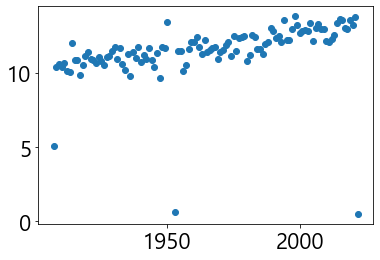

nan


In [28]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

s_df = pd.read_csv('./temp_seoul.csv', encoding='cp949')
s_df['날짜'] = pd.to_datetime(s_df['날짜'])
s_df['연도'] = s_df['날짜'].dt.year
# display(s_df)

df = s_df.groupby(['연도']).mean()
display(df['평균기온(℃)'])


# graph
plt.scatter(df.index, df['평균기온(℃)'])
plt.show()


# 기술통계
mean_temp = df['평균기온(℃)']
Q1 = np.percentile(mean_temp, 25)
Q2 = np.percentile(mean_temp, 50)
Q3 = np.percentile(mean_temp, 75)

IQR = Q3 - Q1
print(IQR)

- 서울의 연평균 기온은 점차 상승하고 있다

#### 2+. 대구 연평균기온

연도
1909    12.815068
1910    12.224384
1911    12.608767
1912    12.381421
1913    11.962466
          ...    
2018    14.189863
2019    14.893425
2020    14.545902
2021    14.661096
2022     3.232911
Name: 평균기온(℃), Length: 114, dtype: float64


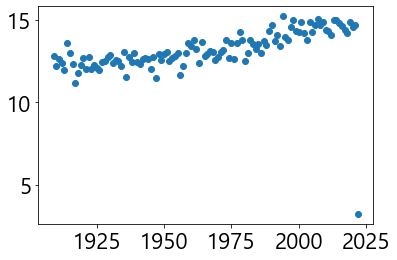

1.5299960700651258


In [29]:
import pandas as pd
import warnings

warnings.filterwarnings(action='ignore')

d_df = pd.read_csv('./temp_daegu.csv', encoding='cp949')
df = d_df.dropna(subset=['평균기온(℃)', '최고기온(℃)', '최저기온(℃)'],
                     axis=0, how='any')
df['날짜'] = pd.to_datetime(df['날짜'])
df['연도'] = df['날짜'].dt.year
# display(df.head())

result = df.groupby(['연도']).mean()
print(result['평균기온(℃)'])


# graph
plt.scatter(result.index, result['평균기온(℃)'])
plt.show()


# 기술통계
mean_temp = result['평균기온(℃)']
Q1 = np.percentile(mean_temp, 25)
Q2 = np.percentile(mean_temp, 50)
Q3 = np.percentile(mean_temp, 75)

IQR = Q3 - Q1
print(IQR)

- 서울보다 연평균기온이 살짝 높고 서울과 마찬가지로 연평균기온이 점차 오르고있다.

#### 3+. 서울 연도별 최저 기온

연도
1907   -20.1
1908   -15.8
1909   -14.6
1910   -19.9
1911   -21.5
        ... 
2018   -17.8
2019   -10.9
2020   -12.9
2021   -18.6
2022   -11.3
Name: 최저기온(℃), Length: 116, dtype: float64

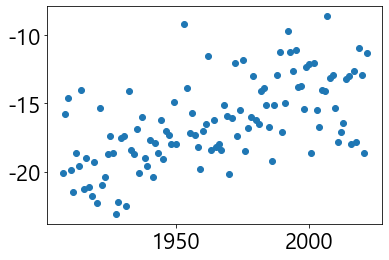

In [40]:
import pandas as pd
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore')

s_df = pd.read_csv('./temp_seoul.csv', encoding='cp949')
s_df['날짜'] = pd.to_datetime(s_df['날짜'])
s_df['연도'] = s_df['날짜'].dt.year
df = s_df.groupby(['연도']).min()
display(df['최저기온(℃)'])


# graph
mpl.rcParams['axes.unicode_minus'] = False

plt.scatter(df.index, df['최저기온(℃)'])
plt.show()



# 기술통계
# low_temp = df['최저기온(℃)'].values
# freq, tmp = np.histogram(low_temp, bins=10, range=(0,100))
# # print(tmp)
# # print(freq)
# freq_class = [str(i) + '~' + str(i+10) for i in range(0,100,10)]
# freq_dist_df = pd.DataFrame({'Frequency':freq},
#                            index=freq_class)
# display(freq_dist_df)

- 연평균 기온보다 일정하지 않지만 점점 증가하는 추세이다

#### 4+. 대구의 연도별 최저온도

연도
1909   -10.9
1910   -14.5
1911   -14.4
1912   -10.2
1913   -14.8
        ... 
2018   -13.9
2019    -7.2
2020   -10.3
2021   -13.6
2022    -9.3
Name: 최저기온(℃), Length: 114, dtype: float64


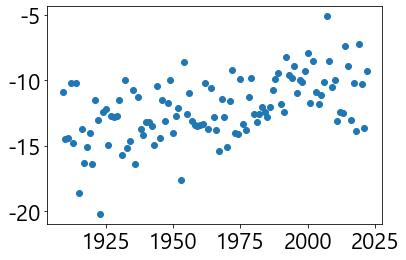

,Frequency
0~10,11596
10~20,12303
20~30,6909
30~40,0
40~50,0
50~60,0
60~70,0
70~80,0
80~90,0
90~100,0


In [38]:
import pandas as pd
import numpy as np
import warnings
import matplotlib as mpl

warnings.filterwarnings(action='ignore')

d_df = pd.read_csv('./temp_daegu.csv', encoding='cp949')
df = d_df.dropna(subset=['평균기온(℃)', '최고기온(℃)', '최저기온(℃)'],
                     axis=0, how='any')
df['날짜'] = pd.to_datetime(df['날짜'])
df['연도'] = df['날짜'].dt.year
# display(df.head())

result = df.groupby(['연도']).min()
print(result['최저기온(℃)'])


# graph
mpl.rcParams['axes.unicode_minus'] = False

plt.scatter(result.index, result['최저기온(℃)'])
plt.show()


# 기술통계
low_temp = df['최저기온(℃)'].values
freq, tmp = np.histogram(low_temp, bins=10, range=(0,100))
# print(tmp)
# print(freq)
freq_class = [str(i) + '~' + str(i+10) for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'Frequency':freq},
                           index=freq_class)
display(freq_dist_df)

- 서울보다 최저기온의 평균이 일정한 편이다.
- 1900년 초반엔 영하 10도~15도 부근이었지만 최근엔 주로 영하 10도 부근이거나 이상이다